In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/time_series.csv")

In [3]:
data.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,1/1/2020 0:00:00,0.0,1.5098490
1,1,1/1/2020 1:00:00,0.0,1.4118588
2,2,1/1/2020 2:00:00,0.0,1.0238976
3,3,1/1/2020 3:00:00,0.0,0.6420000
4,4,1/1/2020 4:00:00,0.0,0.9600000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Hour                                8760 non-null   int64  
 1   Date/hour start                     8760 non-null   object 
 2   Solar electricity generation (kWh)  8760 non-null   float64
 3   Electricity usage (kWh)             8760 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 273.9+ KB


In [5]:
data['Date/hour start'] = pd.to_datetime(data["Date/hour start"])

In [6]:
data['Electricity usage (kWh)'] = data['Electricity usage (kWh)'].str.replace(',', '')

In [7]:
data['Electricity usage (kWh)'] = data['Electricity usage (kWh)'].astype(float)

In [8]:
data.describe()

,Hour,Solar electricity generation (kWh),Electricity usage (kWh)
count,8760.000000,8760.000000,8760.000000
mean,11.500000,1.116750,7.312704
std,6.922582,2.026098,491.479806
min,0.000000,0.000000,-12.624000
25%,5.750000,0.000000,0.300000
50%,11.500000,0.024000,0.621000
75%,17.250000,1.272750,1.686000
max,23.000000,13.050000,46000.000000


In [9]:
data.isna().sum()

Hour                                  0
Date/hour start                       0
Solar electricity generation (kWh)    0
Electricity usage (kWh)               0
dtype: int64

In [10]:
data.duplicated().sum()

0

<Axes: ylabel='Solar electricity generation (kWh)'>

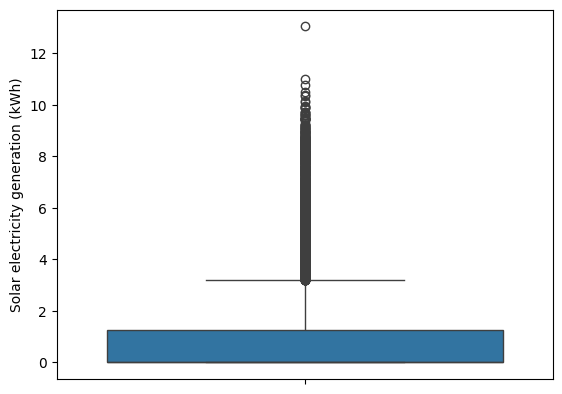

In [11]:
sns.boxplot(y = "Solar electricity generation (kWh)", data = data)

<Axes: ylabel='Electricity usage (kWh)'>

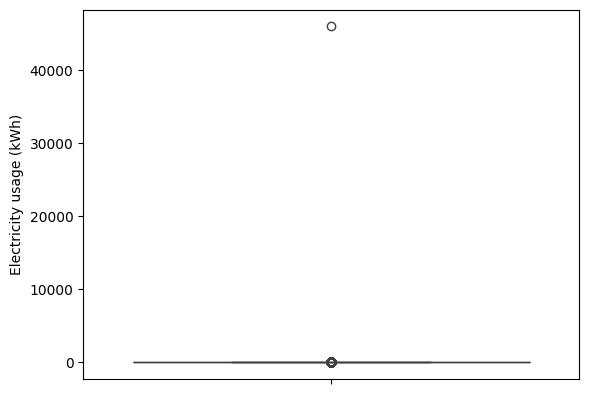

In [12]:
sns.boxplot(data['Electricity usage (kWh)'])

In [13]:
outliers_condition = ((data['Electricity usage (kWh)'] > 1000) |
                (data['Electricity usage (kWh)'] < 0) |
                ((data['Hour'] > 18) | (data['Hour'] < 6)) &
                (data['Solar electricity generation (kWh)'] > 0))


In [14]:
data = data[~outliers_condition]

In [15]:
data.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,2020-01-01 00:00:00,0.0,1.509849
1,1,2020-01-01 01:00:00,0.0,1.411859
2,2,2020-01-01 02:00:00,0.0,1.023898
3,3,2020-01-01 03:00:00,0.0,0.642000
4,4,2020-01-01 04:00:00,0.0,0.960000


In [16]:
data.describe()

,Hour,Solar electricity generation (kWh),Electricity usage (kWh)
count,6943.000000,6943.000000,6943.000000
mean,10.467377,1.383582,1.743528
std,6.392726,2.188174,4.040153
min,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.270000
50%,11.000000,0.273000,0.546000
75%,15.000000,1.834500,1.261237
max,23.000000,10.998000,58.740000


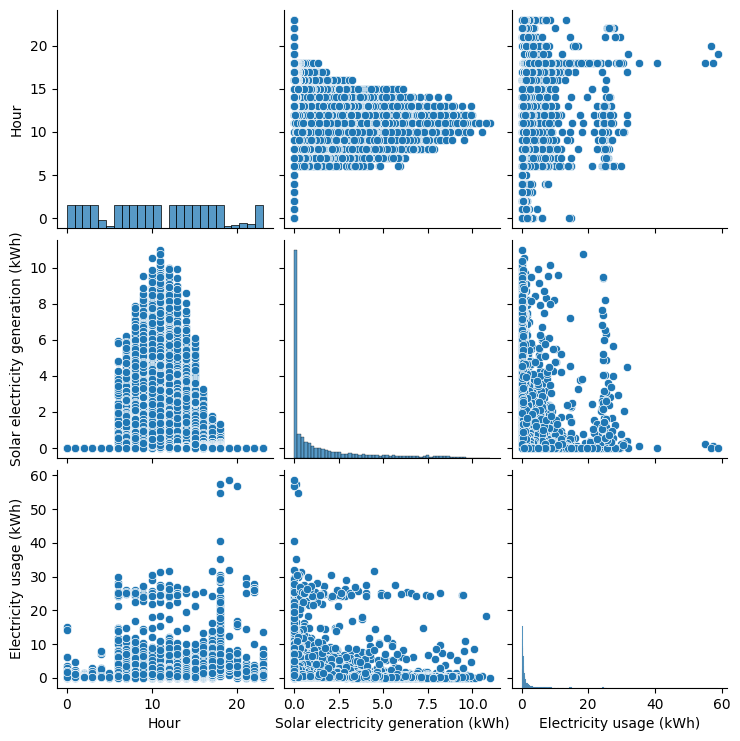

In [17]:
sns.pairplot(data)

In [18]:
avg_hourly_data = data.groupby('Hour')['Solar electricity generation (kWh)', 'Electricity usage (kWh)'].mean()

<ipython-input-18-fa47bddd2342>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_hourly_data = data.groupby('Hour')['Solar electricity generation (kWh)', 'Electricity usage (kWh)'].mean()


In [19]:
avg_hourly_data

,Solar electricity generation (kWh),Electricity usage (kWh)
Hour,,
0,0.000000,0.816471
1,0.000000,0.401787
2,0.000000,0.250623
3,0.000000,0.407688
4,0.000000,0.682961
5,0.000000,0.384182
6,0.722868,2.084071
7,1.394885,1.788123
8,2.210135,1.809272


<Axes: xlabel='Hour'>

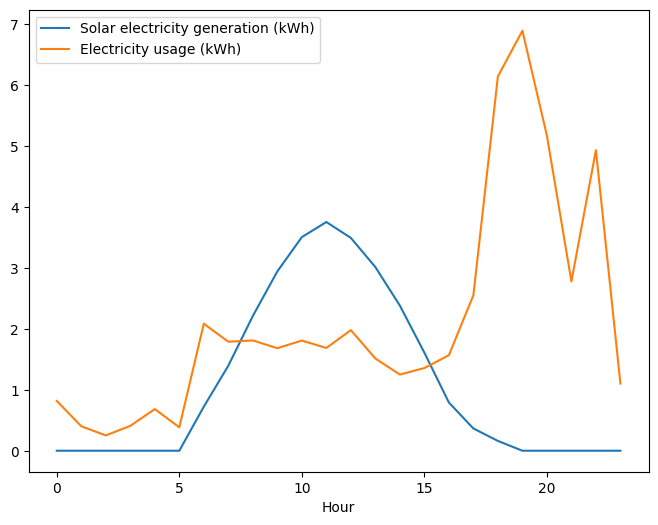

In [20]:
avg_hourly_data.plot(figsize = (8, 6))

In [21]:
data['Electricity Bought (Kwh)'] = data['Electricity usage (kWh)'] - data['Solar electricity generation (kWh)']
data['Electricity Bought (Kwh)'] = data['Electricity Bought (Kwh)'].apply(lambda x: max(0, x))

In [22]:
data['Excess Solar Generation (Kwh)'] = data['Solar electricity generation (kWh)'] - data['Electricity usage (kWh)']
data['Excess Solar Generation (Kwh)'] = data['Excess Solar Generation (Kwh)'].apply(lambda x: max(0, x))

In [23]:
data.head(50)

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Electricity Bought (Kwh),Excess Solar Generation (Kwh)
0,0,2020-01-01 00:00:00,0.000,1.509849,1.509849,0.000
1,1,2020-01-01 01:00:00,0.000,1.411859,1.411859,0.000
2,2,2020-01-01 02:00:00,0.000,1.023898,1.023898,0.000
3,3,2020-01-01 03:00:00,0.000,0.642000,0.642000,0.000
4,4,2020-01-01 04:00:00,0.000,0.960000,0.960000,0.000
6,6,2020-01-01 06:00:00,0.006,0.648000,0.642000,0.000
7,7,2020-01-01 07:00:00,0.009,0.774000,0.765000,0.000
8,8,2020-01-01 08:00:00,0.012,1.299000,1.287000,0.000
9,9,2020-01-01 09:00:00,0.846,0.606000,0.000000,0.240
10,10,2020-01-01 10:00:00,0.000,0.000000,0.000000,0.000


In [24]:
max_battery_capacity = 12.5
cost_per_unit = 0.17
cumulative_charge = 0

In [25]:
cumulative_list = []
charge_list = []
for excess_solar, electricity_bought in zip(data['Excess Solar Generation (Kwh)'], data['Electricity Bought (Kwh)']):
    charge_change = max(-cumulative_charge, excess_solar - electricity_bought)
    cumulative_charge = max(0, min(cumulative_charge + charge_change, max_battery_capacity))

    cumulative_list.append(cumulative_charge)
    charge_list.append(charge_change)

In [26]:
data['Cumulative_charge'] = cumulative_list
data['Hourly_charge_change'] = charge_list

In [27]:
data['Electricity Bought Battery (kWh)'] = data.apply(lambda row: row['Electricity Bought (Kwh)'] + row['Hourly_charge_change'] if row['Hourly_charge_change'] < 0 else row['Electricity Bought (Kwh)'], axis=1)

In [28]:
data.head(50)

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Electricity Bought (Kwh),Excess Solar Generation (Kwh),Cumulative_charge,Hourly_charge_change,Electricity Bought Battery (kWh)
0,0,2020-01-01 00:00:00,0.000,1.509849,1.509849,0.000,0.000,0.000,1.509849
1,1,2020-01-01 01:00:00,0.000,1.411859,1.411859,0.000,0.000,0.000,1.411859
2,2,2020-01-01 02:00:00,0.000,1.023898,1.023898,0.000,0.000,0.000,1.023898
3,3,2020-01-01 03:00:00,0.000,0.642000,0.642000,0.000,0.000,0.000,0.642000
4,4,2020-01-01 04:00:00,0.000,0.960000,0.960000,0.000,0.000,0.000,0.960000
6,6,2020-01-01 06:00:00,0.006,0.648000,0.642000,0.000,0.000,0.000,0.642000
7,7,2020-01-01 07:00:00,0.009,0.774000,0.765000,0.000,0.000,0.000,0.765000
8,8,2020-01-01 08:00:00,0.012,1.299000,1.287000,0.000,0.000,0.000,1.287000
9,9,2020-01-01 09:00:00,0.846,0.606000,0.000000,0.240,0.240,0.240,0.000000
10,10,2020-01-01 10:00:00,0.000,0.000000,0.000000,0.000,0.240,0.000,0.000000


In [29]:
electricity_bought_no_battery = data['Electricity Bought (Kwh)'].sum()
electricity_bought_battery = data['Electricity Bought Battery (kWh)'].sum()

In [30]:
yearly_cost_no_battery = electricity_bought_no_battery * cost_per_unit
yearly_cost_no_battery

1657.7971760479998

In [31]:
yearly_cost_battery = electricity_bought_battery * cost_per_unit
yearly_cost_battery

1125.726685974

In [32]:
cost_saved = yearly_cost_no_battery - yearly_cost_battery
cost_saved

532.0704900739997

In [33]:
data.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Electricity Bought (Kwh),Excess Solar Generation (Kwh),Cumulative_charge,Hourly_charge_change,Electricity Bought Battery (kWh)
0,0,2020-01-01 00:00:00,0.0,1.509849,1.509849,0.0,0.0,0.0,1.509849
1,1,2020-01-01 01:00:00,0.0,1.411859,1.411859,0.0,0.0,0.0,1.411859
2,2,2020-01-01 02:00:00,0.0,1.023898,1.023898,0.0,0.0,0.0,1.023898
3,3,2020-01-01 03:00:00,0.0,0.642000,0.642000,0.0,0.0,0.0,0.642000
4,4,2020-01-01 04:00:00,0.0,0.960000,0.960000,0.0,0.0,0.0,0.960000


In [34]:
data.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Electricity Bought (Kwh),Excess Solar Generation (Kwh),Cumulative_charge,Hourly_charge_change,Electricity Bought Battery (kWh)
0,0,2020-01-01 00:00:00,0.0,1.509849,1.509849,0.0,0.0,0.0,1.509849
1,1,2020-01-01 01:00:00,0.0,1.411859,1.411859,0.0,0.0,0.0,1.411859
2,2,2020-01-01 02:00:00,0.0,1.023898,1.023898,0.0,0.0,0.0,1.023898
3,3,2020-01-01 03:00:00,0.0,0.642000,0.642000,0.0,0.0,0.0,0.642000
4,4,2020-01-01 04:00:00,0.0,0.960000,0.960000,0.0,0.0,0.0,0.960000


In [35]:
data['Month'] = data['Date/hour start'].dt.month

monthly_data = data.groupby('Month')['Solar electricity generation (kWh)',
                                     'Electricity usage (kWh)',
                                     'Electricity Bought (Kwh)',
                                     'Excess Solar Generation (Kwh)',
                                     'Electricity Bought Battery (kWh)'].sum()

<ipython-input-35-2c802d1a828e>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_data = data.groupby('Month')['Solar electricity generation (kWh)',


<Axes: xlabel='Month'>

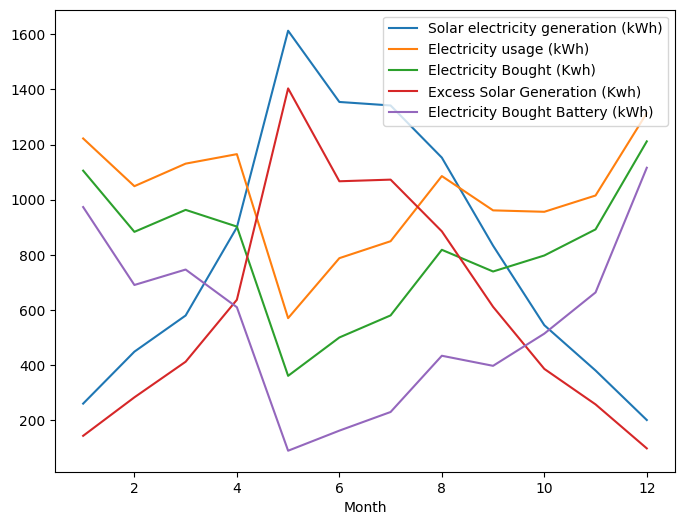

In [36]:
monthly_data.plot(kind='line', figsize=(8, 6))

In [ ]:
price_inflation = 0.04

cashflow = [-7000]
for i in range(20):
  yearly_cost_saving = cost_saved * (1 - price_inflation) ** i
  cashflow.append(yearly_cost_saving)

In [ ]:
cashflow

[-7000,
 532.0704900739997,
 510.78767047103975,
 490.3561636521981,
 470.7419171061102,
 451.91224042186576,
 433.8357508049911,
 416.48232077279147,
 399.8230279418798,
 383.83010682420456,
 368.4769025512364,
 353.7378264491869,
 339.58831339121946,
 326.00478085557063,
 312.96458962134784,
 300.4460060364939,
 288.42816579503415,
 276.89103916323273,
 265.8153975967034,
 255.18278169283525,
 244.97547042512184]

In [ ]:
!pip3 install numpy-financial

In [ ]:
import numpy_financial as npf

In [ ]:
npv = npf.npv(0.06, cashflow)
npv

-2412.58639189708

In [ ]:
irr = npf.irr(cashflow)
irr

0.006491788091107065